## Librería pandas

In [9]:
import pandas as pd
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

# Cargar datos
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

In [11]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [17]:
750/150

5.0

In [19]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [21]:
df['species']

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: category
Categories (3, object): ['setosa', 'versicolor', 'virginica']

In [12]:
type(df)

pandas.core.frame.DataFrame

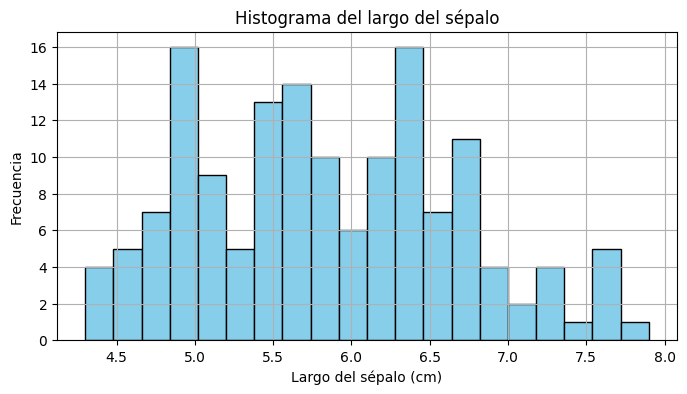

In [22]:
plt.figure(figsize=(8, 4))
plt.hist(df['sepal length (cm)'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histograma del largo del sépalo')
plt.xlabel('Largo del sépalo (cm)')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

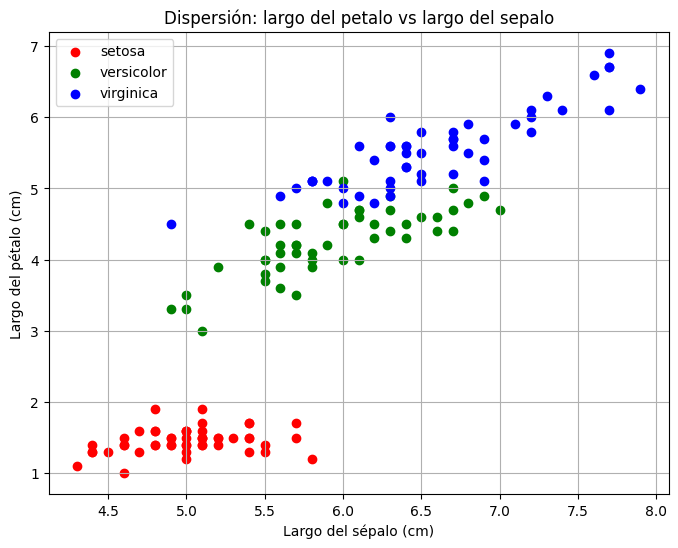

In [29]:
colors = {'setosa': 'red', 'versicolor': 'green', 'virginica': 'blue'}
plt.figure(figsize=(8, 6))

for species in df['species'].unique():
    subset = df[df['species'] == species]
    plt.scatter(subset['sepal length (cm)'], subset['petal length (cm)'],
                label=species, color=colors[species])

plt.title('Dispersión: largo del petalo vs largo del sepalo')
plt.xlabel('Largo del sépalo (cm)')
plt.ylabel('Largo del pétalo (cm)')
plt.legend()
plt.grid(True)
plt.show()

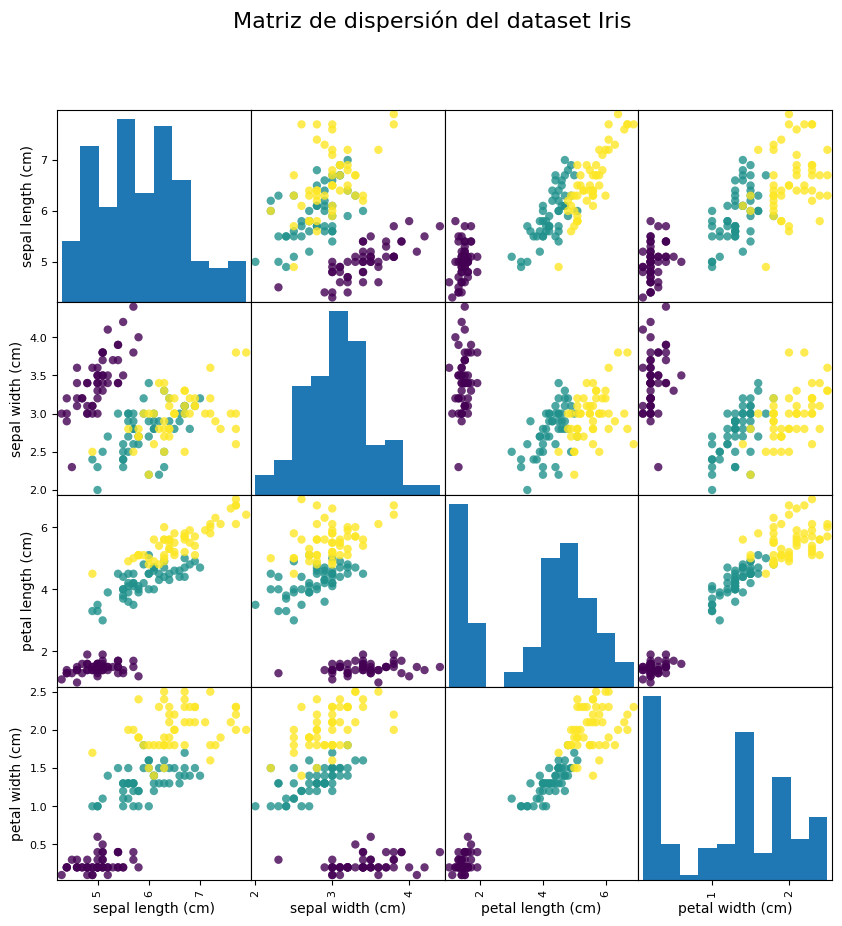

In [30]:
from pandas.plotting import scatter_matrix

scatter_matrix(df.iloc[:, :4], figsize=(10, 10), diagonal='hist', marker='o',
               c=pd.factorize(df['species'])[0], cmap='viridis', alpha=0.8)
plt.suptitle('Matriz de dispersión del dataset Iris', size=16)
plt.show()

<Figure size 1000x600 with 0 Axes>

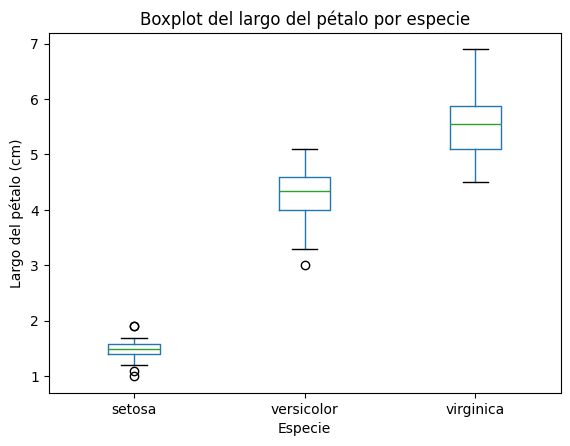

In [31]:
plt.figure(figsize=(10, 6))
df.boxplot(column='petal length (cm)', by='species', grid=False)
plt.title('Boxplot del largo del pétalo por especie')
plt.suptitle('')  # Eliminar el título automático
plt.xlabel('Especie')
plt.ylabel('Largo del pétalo (cm)')
plt.show()

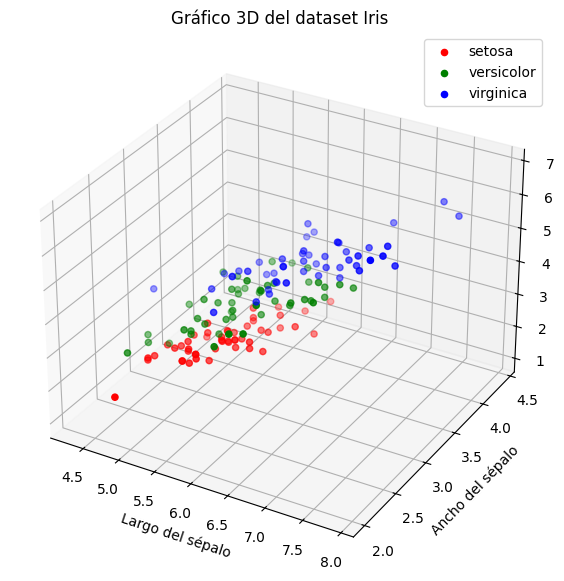

In [32]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

for species in df['species'].unique():
    subset = df[df['species'] == species]
    ax.scatter(subset['sepal length (cm)'],
               subset['sepal width (cm)'],
               subset['petal length (cm)'],
               label=species, color=colors[species])

ax.set_xlabel('Largo del sépalo')
ax.set_ylabel('Ancho del sépalo')
ax.set_zlabel('Largo del pétalo')
ax.set_title('Gráfico 3D del dataset Iris')
ax.legend()
plt.show()

1. Grafica un histograma más detallado de la longitud y ancho del pétalo por especie. A partir de dicho histograma, haz una estimación visual de la media de estas dos variables por especie y checa tu aproximación con el cálculo exacto.

2. ¿Existe alguna correlación entre algún par de las cuatro variables?

3. ¿Cuáles son las características promedio por cada especie?

4. ¿Puedes hacer alguna regla de decisión que te permita identificar la especie de una flor basándote en las variables descritas en el conjunto de datos (dataset)

### Un poco más de pandas

In [34]:
type(df['species'])

pandas.core.series.Series

In [37]:
df['petal length (cm)'].unique()

array([1.4, 1.3, 1.5, 1.7, 1.6, 1.1, 1.2, 1. , 1.9, 4.7, 4.5, 4.9, 4. ,
       4.6, 3.3, 3.9, 3.5, 4.2, 3.6, 4.4, 4.1, 4.8, 4.3, 5. , 3.8, 3.7,
       5.1, 3. , 6. , 5.9, 5.6, 5.8, 6.6, 6.3, 6.1, 5.3, 5.5, 6.7, 6.9,
       5.7, 6.4, 5.4, 5.2])

In [39]:
print(df['sepal width (cm)'].value_counts())

sepal width (cm)
3.0    26
2.8    14
3.2    13
3.4    12
3.1    11
2.9    10
2.7     9
2.5     8
3.5     6
3.3     6
3.8     6
2.6     5
2.3     4
3.6     4
3.7     3
2.4     3
2.2     3
3.9     2
4.4     1
4.0     1
4.1     1
4.2     1
2.0     1
Name: count, dtype: int64


In [41]:
df.groupby('species').agg('std')

C:\Users\andre\AppData\Local\Temp\ipykernel_17212\946221805.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('species').agg('std')


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
species,,,,
setosa,0.352490,0.379064,0.173664,0.105386
versicolor,0.516171,0.313798,0.469911,0.197753
virginica,0.635880,0.322497,0.551895,0.274650


In [42]:
df.groupby('species').describe()

C:\Users\andre\AppData\Local\Temp\ipykernel_17212\1134843197.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('species').describe()


sepal length (cm)                                              \
                       count   mean       std  min    25%  50%  75%  max   
species                                                                    
setosa                  50.0  5.006  0.352490  4.3  4.800  5.0  5.2  5.8   
versicolor              50.0  5.936  0.516171  4.9  5.600  5.9  6.3  7.0   
virginica               50.0  6.588  0.635880  4.9  6.225  6.5  6.9  7.9   

           sepal width (cm)         ... petal length (cm)       \
                      count   mean  ...               75%  max   
species                             ...                          
setosa                 50.0  3.428  ...             1.575  1.9   
versicolor             50.0  2.770  ...             4.600  5.1   
virginica              50.0  2.974  ...             5.875  6.9   

           petal width (cm)                                            
                      count   mean       std  min  25%  50%  75%  max  
species                                                                
setosa                 50.0  0.246  0.105386  0.1  0.2  0.2  0.3  0.6  
versicolor             50.0  1.326  0.197753  1.0  1.2  1.3  1.5  1.8  
virginica              50.0  2.026  0.274650  1.4  1.8  2.0  2.3  2.5  

[3 rows x 32 columns]

In [43]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [44]:
df['petal_ratio'] = df['petal length (cm)'] / df['petal width (cm)']
print(df[['petal length (cm)', 'petal width (cm)', 'petal_ratio']].head())

   petal length (cm)  petal width (cm)  petal_ratio
0                1.4               0.2          7.0
1                1.4               0.2          7.0
2                1.3               0.2          6.5
3                1.5               0.2          7.5
4                1.4               0.2          7.0


In [45]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,petal_ratio
0,5.1,3.5,1.4,0.2,setosa,7.0
1,4.9,3.0,1.4,0.2,setosa,7.0
2,4.7,3.2,1.3,0.2,setosa,6.5
3,4.6,3.1,1.5,0.2,setosa,7.5
4,5.0,3.6,1.4,0.2,setosa,7.0


In [46]:
df[df['species'] == 'setosa']

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,petal_ratio
0,5.1,3.5,1.4,0.2,setosa,7.000000
1,4.9,3.0,1.4,0.2,setosa,7.000000
2,4.7,3.2,1.3,0.2,setosa,6.500000
3,4.6,3.1,1.5,0.2,setosa,7.500000
4,5.0,3.6,1.4,0.2,setosa,7.000000
5,5.4,3.9,1.7,0.4,setosa,4.250000
6,4.6,3.4,1.4,0.3,setosa,4.666667
7,5.0,3.4,1.5,0.2,setosa,7.500000
8,4.4,2.9,1.4,0.2,setosa,7.000000
9,4.9,3.1,1.5,0.1,setosa,15.000000


In [6]:
setosa_larga = df[(df['species'] == 'setosa') & (df['sepal length (cm)'] > 5.0)]
print(setosa_larga)

    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                 5.1               3.5                1.4               0.2   
5                 5.4               3.9                1.7               0.4   
10                5.4               3.7                1.5               0.2   
14                5.8               4.0                1.2               0.2   
15                5.7               4.4                1.5               0.4   
16                5.4               3.9                1.3               0.4   
17                5.1               3.5                1.4               0.3   
18                5.7               3.8                1.7               0.3   
19                5.1               3.8                1.5               0.3   
20                5.4               3.4                1.7               0.2   
21                5.1               3.7                1.5               0.4   
23                5.1               3.3 

In [7]:
df_sorted = df.sort_values(by='petal length (cm)', ascending=False)
print(df_sorted.head())

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
118                7.7               2.6                6.9               2.3   
122                7.7               2.8                6.7               2.0   
117                7.7               3.8                6.7               2.2   
105                7.6               3.0                6.6               2.1   
131                7.9               3.8                6.4               2.0   

       species  petal_ratio  
118  virginica     3.000000  
122  virginica     3.350000  
117  virginica     3.045455  
105  virginica     3.142857  
131  virginica     3.200000  


In [11]:
cor_matrix = df.iloc[:, :-2].corr()  # Excluir la columna 'species' y 'petal_ratio'
print("Matriz de correlación:\n", cor_matrix)

Matriz de correlación:
                    sepal length (cm)  sepal width (cm)  petal length (cm)  \
sepal length (cm)           1.000000         -0.117570           0.871754   
sepal width (cm)           -0.117570          1.000000          -0.428440   
petal length (cm)           0.871754         -0.428440           1.000000   
petal width (cm)            0.817941         -0.366126           0.962865   

                   petal width (cm)  
sepal length (cm)          0.817941  
sepal width (cm)          -0.366126  
petal length (cm)          0.962865  
petal width (cm)           1.000000  


# Merge y groupBy 

In [47]:
# DataFrame de ventas
ventas = pd.DataFrame({
    'id_cliente': [1, 2, 3, 4],
    'venta': [100, 200, 150, 300]
})

# DataFrame de información de clientes
clientes = pd.DataFrame({
    'id_cliente': [1, 2, 3, 5],
    'nombre': ['Ana', 'Luis', 'Pedro', 'Marta']
})

In [48]:
ventas

,id_cliente,venta
0,1,100
1,2,200
2,3,150
3,4,300


In [49]:
clientes

,id_cliente,nombre
0,1,Ana
1,2,Luis
2,3,Pedro
3,5,Marta


In [53]:
# Unir ambos dataframes por 'id_cliente'
df_merged = pd.merge(ventas, clientes, on='id_cliente', how='outer')

df_merged

,id_cliente,venta,nombre
0,1,100.0,Ana
1,2,200.0,Luis
2,3,150.0,Pedro
3,4,300.0,NaN
4,5,NaN,Marta


In [46]:
# DataFrame de ventas
ventas = pd.DataFrame({
    'categoria': ['A', 'B', 'A', 'B', 'C', 'A'],
    'ventas': [100, 200, 150, 300, 50, 250]
})

In [47]:
ventas

,categoria,ventas
0,A,100
1,B,200
2,A,150
3,B,300
4,C,50
5,A,250


In [51]:
# Agrupar por categoría y sumar ventas
resumen = ventas.groupby('categoria')['ventas'].sum().reset_index()

resumen

,categoria,ventas
0,A,500
1,B,500
2,C,50


In [50]:
resumen_multi = ventas.groupby('categoria')['ventas'].agg(['sum', 'mean', 'count']).reset_index()

resumen_multi

,categoria,sum,mean,count
0,A,500,166.666667,3
1,B,500,250.000000,2
2,C,50,50.000000,1


In [52]:
# Supongamos que tenemos empleados y departamentos
empleados = pd.DataFrame({
    'id_empleado': [1, 2, 3, 4],
    'id_depto': [10, 10, 20, 30],
    'salario': [1000, 1200, 1100, 1300]
})

departamentos = pd.DataFrame({
    'id_depto': [10, 20, 30],
    'nombre_depto': ['Ventas', 'Marketing', 'IT']
})

In [53]:
empleados

,id_empleado,id_depto,salario
0,1,10,1000
1,2,10,1200
2,3,20,1100
3,4,30,1300


In [54]:
departamentos

,id_depto,nombre_depto
0,10,Ventas
1,20,Marketing
2,30,IT


In [ ]:
# Merge para agregar nombre de departamento
df = pd.merge(empleados, departamentos, on='id_depto', how='left')

# Agrupar por departamento y obtener salario promedio
salario_promedio = df.groupby('nombre_depto')['salario'].mean().reset_index()

salario_promedio

,nombre_depto,salario
0,IT,1300.0
1,Marketing,1100.0
2,Ventas,1100.0


: 